In [71]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

## Coherence

In [4]:
# Read coherence files and append all to data frame
path = "../data/bids/derivatives/coherence/*_coh*"
coh = pd.DataFrame()
for fpath in glob.glob(path):
    data = pd.read_pickle(fpath)
    coh = pd.concat([coh, data])
coh = coh.set_index('index')

In [52]:
# Average across channels
coh_chan_avg = coh.groupby(['sub', 'cond']).mean()
coh_chan_avg = coh_chan_avg.drop(columns = ['chan'])
coh_chan_avg = coh_chan_avg.reset_index()

# Average across subjects for barplot
coh_sub_avgs = coh_chan_avg.groupby(['cond']).mean()
indexes = pd.Series([2, 3, 4, 5, 1])
coh_sub_avgs = coh_sub_avgs.set_index(indexes)
coh_sub_avgs = coh_sub_avgs.sort_index(ascending=True)
coh_sub_avgs

# Calculate standard deviation
stds = coh_chan_avg.groupby(['cond']).std()
stds = stds.set_index(indexes)
stds = stds.sort_index(ascending=True)
stds

,50,100,150,200,250
1,0.055834,0.011759,0.006816,0.006306,0.006689
2,0.007709,0.035285,0.006582,0.010301,0.007443
3,0.009289,0.006388,0.057085,0.007558,0.008829
4,0.008027,0.007433,0.007517,0.056421,0.007606
5,0.009400,0.006904,0.007766,0.006842,0.072307


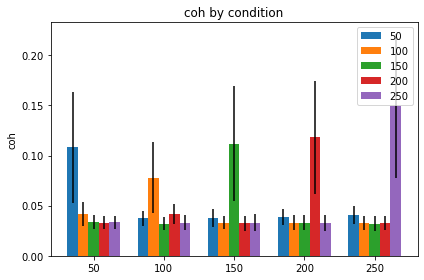

In [53]:
# Plot grouped bar chart
fig, ax = plt.subplots()
labels = ['50', '100', '150', '200', '250']

x = np.arange(len(labels))
width = 0.15

rect1 = ax.bar(x - width*2, coh_sub_avgs['50'], yerr = stds['50'], width = width, label = '50')
rect2 = ax.bar(x - width*1, coh_sub_avgs['100'], yerr = stds['100'], width = width, label = '100')
rect3 = ax.bar(x + width*0, coh_sub_avgs['150'], yerr = stds['150'], width = width, label = '150')
rect4 = ax.bar(x + width*1, coh_sub_avgs['200'], yerr = stds['200'], width = width, label = '200')
rect5 = ax.bar(x + width*2, coh_sub_avgs['250'], yerr = stds['250'], width = width, label = '250')

# Add some labels
ax.set_ylabel('coh')
ax.set_title('coh by condition')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

#### Boxplots with seaborn

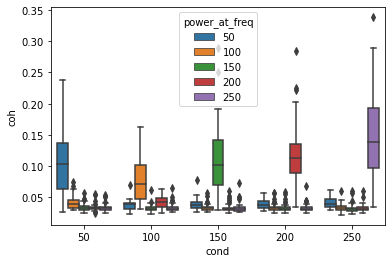

In [58]:
# Pivot into tidy
coh_tidy = coh_chan_avg
coh_tidy["cond"] = pd.to_numeric(coh_tidy["cond"])
coh_tidy = pd.melt(coh_tidy, 
                     id_vars = ['sub', 'cond'], 
                     value_vars=['50', '100', '150', '200', '250'],
                     var_name = 'power_at_freq',
                     value_name = 'coh')

ax = sns.boxplot(x = "cond", 
                 y = "coh", 
                 hue = "power_at_freq", 
                 data = coh_tidy)

#### ANOVA

In [77]:
# Subset by condition
coh_50 = coh_chan_avg[coh_chan_avg['cond'] == 50]
coh_100 = coh_chan_avg[coh_chan_avg['cond'] == 100]
coh_150 = coh_chan_avg[coh_chan_avg['cond'] == 150]
coh_200 = coh_chan_avg[coh_chan_avg['cond'] == 200]
coh_250 = coh_chan_avg[coh_chan_avg['cond'] == 250]

# Compute ANOVA by condition
f_50, p_50 = f_oneway(coh_50['50'], coh_50['100'], coh_50['150'], coh_50['200'], coh_50['250'])
f_100, p_100 = f_oneway(coh_100['50'], coh_100['100'], coh_100['150'], coh_100['200'], coh_100['250'])
f_150, p_150 = f_oneway(coh_150['50'], coh_150['100'], coh_150['150'], coh_150['200'], coh_150['250'])
f_200, p_200 = f_oneway(coh_200['50'], coh_200['100'], coh_200['150'], coh_200['200'], coh_200['250'])
f_250, p_250 = f_oneway(coh_250['50'], coh_250['100'], coh_250['150'], coh_250['200'], coh_250['250'])

# Print p-values
print(f"ANOVA for coherence differences at 50 Hz:, f = {f_50}, p = {p_50}")
print(f"ANOVA for coherence differences at 50 Hz:, f = {f_100}, p = {p_100}")
print(f"ANOVA for coherence differences at 50 Hz:, f = {f_150}, p = {p_150}")
print(f"ANOVA for coherence differences at 50 Hz:, f = {f_200}, p = {p_200}")
print(f"ANOVA for coherence differences at 50 Hz:, f = {f_250}, p = {p_250}")

ANOVA for coherence differences at 50 Hz:, f = 56.82105232982657, p = 1.1801429912925306e-30
ANOVA for coherence differences at 50 Hz:, f = 43.58815334704043, p = 2.4001318027702416e-25
ANOVA for coherence differences at 50 Hz:, f = 62.189316154123055, p = 1.2945491970191154e-32
ANOVA for coherence differences at 50 Hz:, f = 74.74830050280522, p = 7.681828393732256e-37
ANOVA for coherence differences at 50 Hz:, f = 87.32805871154292, p = 1.1877459714203103e-40


## Imaginary coherence

In [7]:
# Read coherence files and append all to data frame
path = "../data/bids/derivatives/coherence/*_imcoh*"
imcoh = pd.DataFrame()
for fpath in glob.glob(path):
    data = pd.read_pickle(fpath)
    imcoh = pd.concat([imcoh, data])
imcoh = imcoh.set_index('index')

In [54]:
# Average across channels
imcoh_chan_avg = imcoh.groupby(['sub', 'cond']).mean()
imcoh_chan_avg = imcoh_chan_avg.drop(columns = ['chan'])
imcoh_chan_avg = imcoh_chan_avg.reset_index()

# Average across subjects for barplot
imcoh_sub_avgs = imcoh_chan_avg.groupby(['cond']).mean()
indexes = pd.Series([2, 3, 4, 5, 1])
imcoh_sub_avgs = imcoh_sub_avgs.set_index(indexes)
imcoh_sub_avgs = imcoh_sub_avgs.sort_index(ascending=True)
print(imcoh_sub_avgs)

# Calculate standard deviation
stds = imcoh_chan_avg.groupby(['cond']).std()
stds = stds.set_index(indexes)
stds = stds.sort_index(ascending=True)
print(stds)

         50       100       150       200       250
1 -0.004374  0.002392 -0.001099  0.000495  0.000169
2 -0.000181  0.000594  0.000149 -0.002716  0.000024
3 -0.001095  0.000290 -0.008304  0.000719  0.000368
4  0.000605 -0.000197 -0.000640  0.006587 -0.000726
5 -0.000487 -0.000122  0.000937  0.000139  0.015271
         50       100       150       200       250
1  0.009582  0.004873  0.002500  0.003044  0.002411
2  0.002744  0.011853  0.002326  0.005925  0.002108
3  0.003581  0.002445  0.021045  0.002132  0.001866
4  0.003013  0.002481  0.003994  0.020538  0.001873
5  0.004066  0.002999  0.003032  0.002349  0.027109


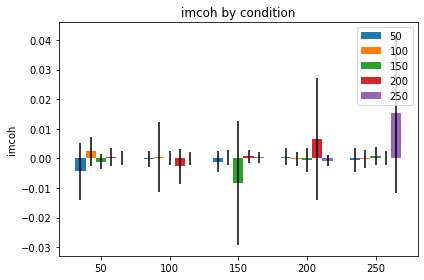

In [55]:
# Plot grouped bar chart
fig, ax = plt.subplots()
labels = ['50', '100', '150', '200', '250']

x = np.arange(len(labels))
width = 0.15

rect1 = ax.bar(x - width*2, imcoh_sub_avgs['50'], yerr = stds['50'], width = width, label = '50')
rect2 = ax.bar(x - width*1, imcoh_sub_avgs['100'], yerr = stds['100'], width = width, label = '100')
rect3 = ax.bar(x + width*0, imcoh_sub_avgs['150'], yerr = stds['150'], width = width, label = '150')
rect4 = ax.bar(x + width*1, imcoh_sub_avgs['200'], yerr = stds['200'], width = width, label = '200')
rect5 = ax.bar(x + width*2, imcoh_sub_avgs['250'], yerr = stds['250'], width = width, label = '250')

# Add some labels
ax.set_ylabel('imcoh')
ax.set_title('imcoh by condition')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

#### Boxplots with seaborn

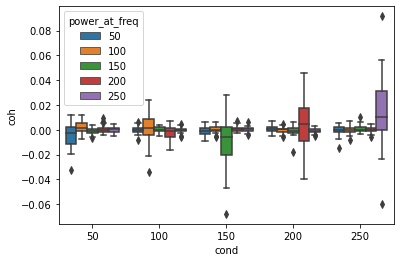

In [59]:
# Pivot into tidy
imcoh_tidy = imcoh_chan_avg
imcoh_tidy["cond"] = pd.to_numeric(imcoh_tidy["cond"])
imcoh_tidy = pd.melt(imcoh_tidy, 
                     id_vars = ['sub', 'cond'], 
                     value_vars=['50', '100', '150', '200', '250'],
                     var_name = 'power_at_freq',
                     value_name = 'coh')

ax = sns.boxplot(x = "cond", 
                 y = "coh", 
                 hue = "power_at_freq", 
                 data = imcoh_tidy)

#### ANOVA

In [78]:
# Subset by condition
imcoh_50 = imcoh_chan_avg[imcoh_chan_avg['cond'] == 50]
imcoh_100 = imcoh_chan_avg[imcoh_chan_avg['cond'] == 100]
imcoh_150 = imcoh_chan_avg[imcoh_chan_avg['cond'] == 150]
imcoh_200 = imcoh_chan_avg[imcoh_chan_avg['cond'] == 200]
imcoh_250 = imcoh_chan_avg[imcoh_chan_avg['cond'] == 250]

# Compute ANOVA by condition
f_50, p_50 = f_oneway(imcoh_50['50'], imcoh_50['100'], imcoh_50['150'], imcoh_50['200'], imcoh_50['250'])
f_100, p_100 = f_oneway(imcoh_100['50'], imcoh_100['100'], imcoh_100['150'], imcoh_100['200'], imcoh_100['250'])
f_150, p_150 = f_oneway(imcoh_150['50'], imcoh_150['100'], imcoh_150['150'], imcoh_150['200'], imcoh_150['250'])
f_200, p_200 = f_oneway(imcoh_200['50'], imcoh_200['100'], imcoh_200['150'], imcoh_200['200'], imcoh_200['250'])
f_250, p_250 = f_oneway(imcoh_250['50'], imcoh_250['100'], imcoh_250['150'], imcoh_250['200'], imcoh_250['250'])

# Print p-values
print(f"ANOVA for imcoherence differences at 50 Hz:, f = {f_50}, p = {p_50}")
print(f"ANOVA for imcoherence differences at 50 Hz:, f = {f_100}, p = {p_100}")
print(f"ANOVA for imcoherence differences at 50 Hz:, f = {f_150}, p = {p_150}")
print(f"ANOVA for imcoherence differences at 50 Hz:, f = {f_200}, p = {p_200}")
print(f"ANOVA for imcoherence differences at 50 Hz:, f = {f_250}, p = {p_250}")

ANOVA for imcoherence differences at 50 Hz:, f = 7.814765288261827, p = 8.598597379602848e-06
ANOVA for imcoherence differences at 50 Hz:, f = 1.5145746919604068, p = 0.20022856717644102
ANOVA for imcoherence differences at 50 Hz:, f = 5.250353347780638, p = 0.0005257841774650472
ANOVA for imcoherence differences at 50 Hz:, f = 3.574541231295115, p = 0.007980476690198857
ANOVA for imcoherence differences at 50 Hz:, f = 10.133815919506208, p = 2.3259834064588623e-07
